# Call ROH on Melanie's data.
Try various methods

In [5]:
import numpy as np
import pandas as pd
import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.insert(0,"./package/")  # hack to get local development package first in path
from hapsburg.PackagesSupport.hapsburg_run import hapsb_ind
from hapsburg.figures.plot_posterior import plot_posterior_cm

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Call ROH on Melanies exaple data, chromosome 4, with standard 1240K reference

In [8]:
hapsb_ind(iid="COL336", chs=range(4, 5), 
          path_targets='./Data/Melanie/ROH', # The path before the .ind, .snp, .geno
          h5_path1000g='./Data/1000Genomes/HDF5/1240kHDF5/all1240int8/chr', 
          meta_path_ref='./Data/1000Genomes/Individuals/meta_df_all.csv', 
          folder_out='./Empirical/Eigenstrat/Melanie/default',  # Folder where you want to save the results to 
          processes=1, output=True,
          readcounts=False, logfile=False, combine=False)

Doing Individual COL336...
Running 1 total jobs; 1 in parallel.
Using Low-Mem Cython Linear Speed Up.
Loaded Pre Processing Model: Eigenstrat
Loading Individual: COL336

Loaded 68759 variants
Loaded 2504 individuals
HDF5 loaded from ./Data/1000Genomes/HDF5/1240kHDF5/all1240int8/chr4.hdf5
Eigenstrat packed: False
3 Eigenstrat Files with 2 Individuals and 5480936 SNPs

Intersection on Positions: 68759
Nr of Matching Refs: 68759 / 68759
Ref/Alt Matching: 68759 / 68759
Flipped Ref/Alt Matching: 0
Together: 68759 / 68759
2504 / 2504 Individuals included in Reference
Extracting up to 2504 Individuals
Extraction of 5008 Haplotypes complete
Flipping Ref/Alt Alleles in target for 0 SNPs...
Reduced to markers called 12842 / 68759
Fraction SNPs covered: 0.1868
Successfully saved target individual data to: ./Empirical/Eigenstrat/Melanie/default/COL336/chr4/
Shuffling phase of target...
Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/default/COL336/chr4/
Loaded Emission Model: haploid

# Plot the inferred Posterior

Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/default/CLR44/chr4/


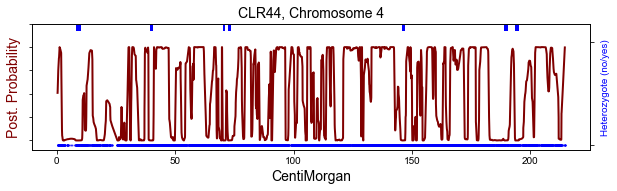

In [7]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Melanie/default/CLR44/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="CLR44, Chromosome 4")

Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/default/COL336/chr4/


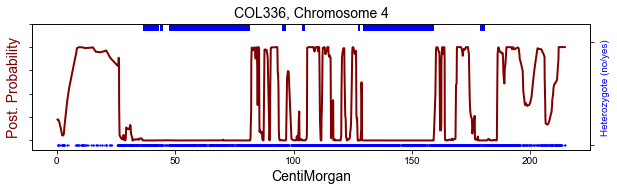

In [9]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Melanie/default/COL336/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="COL336, Chromosome 4")

# Try and see what happens when using European 1000G reference

In [8]:
%%time 
# COL336
hapsb_ind(iid="CLR44", chs=range(4, 5), 
          path_targets='./Data/Melanie/ROH', # The path before the .ind, .snp, .geno
          h5_path1000g='./Data/1000Genomes/HDF5/FULLHDF5/maf02_chr', 
          meta_path_ref='./Data/1000Genomes/Individuals/meta_df_all.csv', 
          folder_out='./Empirical/Eigenstrat/Melanie/1000G',  # Folder where you want to save the results to 
          p_model='Eigenstrat',
          processes=1, output=True, readcounts=False, logfile=False, combine=False)

Doing Individual CLR44...
Running 1 total jobs; 1 in parallel.
Running single process...
Using Low-Mem Cython Linear Speed Up.
Loaded Pre Processing Model: Eigenstrat
Loading Individual: CLR44

Loaded 1690781 variants
Loaded 2504 individuals
HDF5 loaded from ./Data/1000Genomes/HDF5/FULLHDF5/maf02_chr4.hdf5
Eigenstrat packed: False
3 Eigenstrat Files with 2 Individuals and 5480936 SNPs

Intersection on Positions: 1518605
Nr of Matching Refs: 1518605 / 1518605
Ref/Alt Matching: 1515969 / 1518605
Flipped Ref/Alt Matching: 0
Together: 1515969 / 1518605
2504 / 2504 Individuals included in Reference
Extracting up to 2504 Individuals
Reduced to markers with data: 293949 / 1515969
Fraction SNPs covered: 0.1939
Exctraction of hdf5 done. Subsetting...!
Extraction of 5008 Haplotypes complete
Flipping Ref/Alt Alleles in target for 0 SNPs...
Successfully saved target individual data to: ./Empirical/Eigenstrat/Melanie/1000G/CLR44/chr4/
Shuffling phase of target...
Successfully loaded Data from: ./Em

Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/1000G/COL336/chr4/


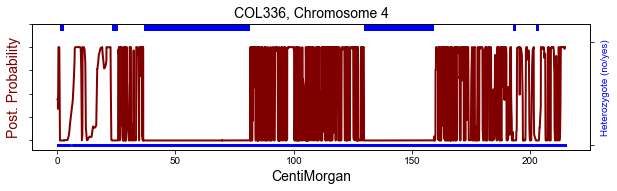

In [6]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Melanie/1000G/COL336/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="COL336, Chromosome 4")

Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/default/COL336/chr4/


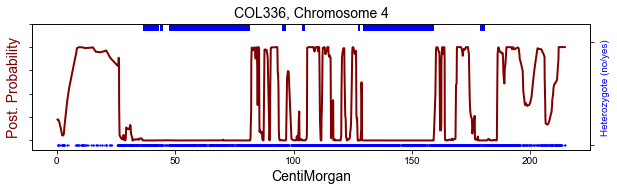

In [7]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Melanie/default/COL336/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="COL336, Chromosome 4")

Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/1000G/CLR44/chr4/


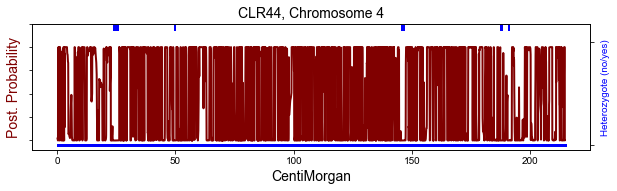

In [9]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Melanie/1000G/CLR44/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="CLR44, Chromosome 4")

Successfully loaded Data from: ./Empirical/Eigenstrat/Melanie/default/CLR44/chr4/


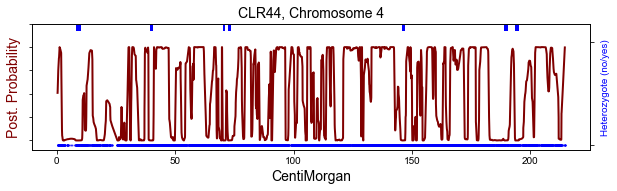

In [11]:
plot_posterior_cm(folder = "./Empirical/Eigenstrat/Melanie/default/CLR44/chr4/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="CLR44, Chromosome 4")